## 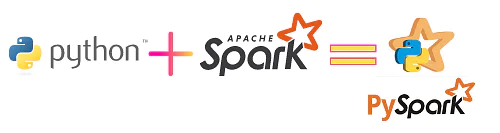

# Handling missing Values with pyspark 
* Dropping columns
* dropping Rows
* various parameter in droping functionalitys
* Handling missing values mean,median,mode

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('Missing_values').getOrCreate()

In [3]:
spark

In [4]:
df_pyspark = spark.read.csv('Employe.csv',header=True,inferSchema=True)

In [5]:
df_pyspark.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
|         null|  34|      null|
|      aravind|null|         3|
|       hitesh|null|      null|
+-------------+----+----------+



In [6]:
# droping columns
df_drop = df_pyspark.drop('name','age ')
df_drop.show()

+----------+
|experience|
+----------+
|         2|
|         1|
|         7|
|        10|
|         3|
|         4|
|      null|
|         3|
|      null|
+----------+



In [7]:
## drop null values in dataset
df_null = df_pyspark.na.drop()
df_null.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
+-------------+----+----------+



In [8]:
## drop null values in dataset with how == any
df_param = df_pyspark.na.drop(how='any')  # any is drop the column where the all null vaklues in row
df_param.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
+-------------+----+----------+



In [9]:
## drop null values in dataset with how == any
df_param_all = df_pyspark.na.drop(how='all')  #  drop the column where the all null vaklues in row else its shows the null values
df_param_all.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
|         null|  34|      null|
|      aravind|null|         3|
|       hitesh|null|      null|
+-------------+----+----------+



In [10]:
## drop null values in dataset with threshold method
df_param_all = df_pyspark.na.drop(thresh=2)  # drop the column where the thresh 2 null vaklues in a row
df_param_all.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
|      aravind|null|         3|
+-------------+----+----------+



In [11]:
df_pyspark.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
|         null|  34|      null|
|      aravind|null|         3|
|       hitesh|null|      null|
+-------------+----+----------+



In [12]:
## drop null values in dataset with how == any
df_param_sub = df_pyspark.na.drop(how='any',subset=['age '])  # drop the column where the subset of column name null vaklues in row
df_param_sub.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
|         null|  34|      null|
+-------------+----+----------+



# Handling Missing values

In [13]:
df_pyspark.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
|         null|  34|      null|
|      aravind|null|         3|
|       hitesh|null|      null|
+-------------+----+----------+



In [14]:
## load the data
df = spark.read.option('header','true').csv('Employe.csv',inferSchema=True)

In [15]:
df.show()

+-------------+----+----------+
|         name|age |experience|
+-------------+----+----------+
|Vineeth Reddy|  25|         2|
| Rakesh Reddy|  24|         1|
|    Sudhanshu|  32|         7|
|   Krish Naik|  35|        10|
|         abhi|  26|         3|
|        Ayush|  27|         4|
|         null|  34|      null|
|      aravind|null|         3|
|       hitesh|null|      null|
+-------------+----+----------+



In [16]:
## handling the missing values using the mean and median

from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols = ['age ', 'experience'],
    outputCols = ["{}_imputed".format(a) for a in ['age ', 'experience']]
).setStrategy("median")


In [17]:
df=imputer.fit(df).transform(df)

In [18]:
df.show()

+-------------+----+----------+------------+------------------+
|         name|age |experience|age _imputed|experience_imputed|
+-------------+----+----------+------------+------------------+
|Vineeth Reddy|  25|         2|          25|                 2|
| Rakesh Reddy|  24|         1|          24|                 1|
|    Sudhanshu|  32|         7|          32|                 7|
|   Krish Naik|  35|        10|          35|                10|
|         abhi|  26|         3|          26|                 3|
|        Ayush|  27|         4|          27|                 4|
|         null|  34|      null|          34|                 3|
|      aravind|null|         3|          27|                 3|
|       hitesh|null|      null|          27|                 3|
+-------------+----+----------+------------+------------------+



In [19]:
# drop the columns where before imputed columns
df=df.drop('age ','experience')

In [20]:
df.show()

+-------------+------------+------------------+
|         name|age _imputed|experience_imputed|
+-------------+------------+------------------+
|Vineeth Reddy|          25|                 2|
| Rakesh Reddy|          24|                 1|
|    Sudhanshu|          32|                 7|
|   Krish Naik|          35|                10|
|         abhi|          26|                 3|
|        Ayush|          27|                 4|
|         null|          34|                 3|
|      aravind|          27|                 3|
|       hitesh|          27|                 3|
+-------------+------------+------------------+



In [21]:
# fill the value of the name column
df=df.na.fill('Ritesh')

In [22]:
df.show()

+-------------+------------+------------------+
|         name|age _imputed|experience_imputed|
+-------------+------------+------------------+
|Vineeth Reddy|          25|                 2|
| Rakesh Reddy|          24|                 1|
|    Sudhanshu|          32|                 7|
|   Krish Naik|          35|                10|
|         abhi|          26|                 3|
|        Ayush|          27|                 4|
|       Ritesh|          34|                 3|
|      aravind|          27|                 3|
|       hitesh|          27|                 3|
+-------------+------------+------------------+

